In [1]:
import nltk

In [2]:
nltk.download_shell()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> l

Packages:
  [ ] abc................. Australian Broadcasting Commission 2006
  [ ] alpino.............. Alpino Dutch Treebank
  [ ] averaged_perceptron_tagger Averaged Perceptron Tagger
  [ ] averaged_perceptron_tagger_ru Averaged Perceptron Tagger (Russian)
  [ ] basque_grammars..... Grammars for Basque
  [ ] biocreative_ppi..... BioCreAtIvE (Critical Assessment of Information
                           Extraction Systems in Biology)
  [ ] bllip_wsj_no_aux.... BLLIP Parser: WSJ Model
  [ ] book_grammars....... Grammars from NLTK Book
  [ ] brown............... Brown Corpus
  [ ] brown_tei........... Brown Corpus (TEI XML Version)
  [ ] cess_cat............ CESS-CAT Treebank
  [ ] cess_esp............ CESS-ESP Treebank
  [ ] chat80.....

Downloader> q


In [3]:
messages = [line.rstrip() for line in open('smsspamcollection/SMSSpamCollection')]

In [4]:
messages[2]

"spam\tFree entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"

In [5]:
print(len(messages))

5574


# Enumerate
Enumerate is a built-in function of Python. It’s usefulness can not be summarized in a single line. Yet most of the newcomers and even some advanced programmers are unaware of it. It allows us to loop over something and have an automatic counter. Here is an example:

for counter, value in enumerate(some_list):
    print(counter, value)

In [6]:
for mess_no, message in enumerate(messages[:10]):
    print(mess_no,message)

0 ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...
1 ham	Ok lar... Joking wif u oni...
2 spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
3 ham	U dun say so early hor... U c already then say...
4 ham	Nah I don't think he goes to usf, he lives around here though
5 spam	FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, Â£1.50 to rcv
6 ham	Even my brother is not like to speak with me. They treat me like aids patent.
7 ham	As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune
8 spam	WINNER!! As a valued network customer you have been selected to receivea Â£900 prize reward! To claim call 09061701461. Claim code KL341. Valid 1

In [7]:
import pandas as pd

In [8]:
#Reading the file
messages = pd.read_csv('smsspamcollection/SMSSpamCollection', sep='\t',names=['label','message'])

In [9]:
#Checking the head
messages.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
messages.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [11]:
#Sorry, I'll call later is the message which has occured most number of times.

In [13]:
#Checking the frequency of words as per the category
messages.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [14]:
#Please call our customer Service Representative.... is the most commonly occuring SPAM message

In [16]:
# Checking Length of the messages
messages['length'] = messages['message'].apply(len)
messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

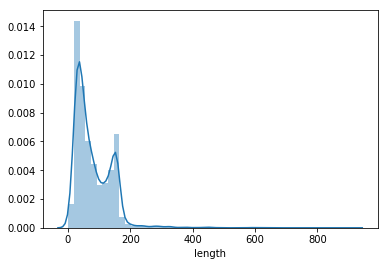

In [20]:
#Checking the distribution of the length
sns.distplot(messages['length'])

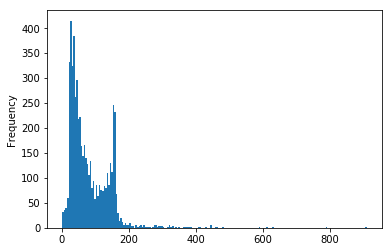

In [22]:
messages['length'].plot.hist(bins=200)

In [23]:
# The maximum length of the message is greater than 900

In [24]:
messages['length'].describe()

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

In [25]:
#Length of the maximum message is 910

In [26]:
#Checking the message

In [36]:
messages[messages['length']==910]['message'].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002A2CDC36A90>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x000002A2CDC9A9E8>], dtype=object)

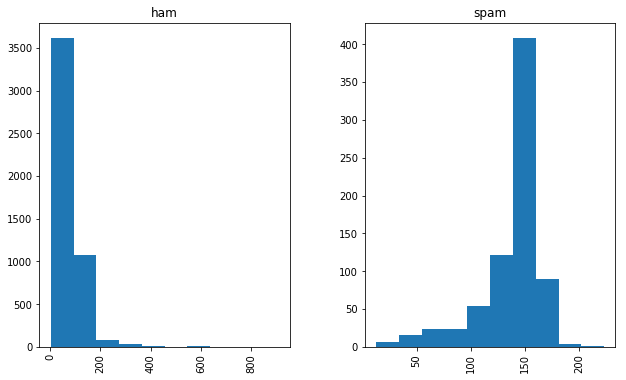

In [37]:
#Length of messages by category
messages.hist(column='length', by='label', figsize=(10,6))

In [41]:
#The SPAM Message with maximum length
messages.groupby('label').describe()

length                                                         
        count        mean        std   min    25%    50%    75%    max
label                                                                 
ham    4825.0   71.482487  58.440652   2.0   33.0   52.0   93.0  910.0
spam    747.0  138.670683  28.873603  13.0  133.0  149.0  157.0  223.0

In [42]:
#Spam message with the maximum length is of 223 characters


In [45]:
#Checking the message
messages[messages['length']==223]['message'].iloc[0]

'Hi, this is Mandy Sullivan calling from HOTMIX FM...you are chosen to receive £5000.00 in our Easter Prize draw.....Please telephone 09041940223 to claim before 29/03/05 or your prize will be transferred to someone else....'

In [46]:
# Classification algorithms require some sort of numerical values to do the classification. I shall be converting corpus(bag of words)
#to the vector
#I shall be removing words like a, an , the also known as stop words ( I have used nltk library for that)


In [49]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [48]:
import string

In [60]:
from nltk.corpus import stopwords

In [61]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [62]:
def text_process(mess):
    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Returns a list of the cleaned text ( turn all the words to lowercase)
    """
    # Check characters to see if they are in punctuation
    nopunc = [char for char in mess if char not in string.punctuation]

    # Join the characters again to form the string.
    nopunc = ''.join(nopunc)
    
    # Now just remove any stopwords
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [64]:
messages['message'].head(5).apply(text_process)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: message, dtype: object

#STEPS FOR VECTORIZATION 

Count how many times does a word occur in each message (Known as term frequency)

Weigh the counts, so that frequent tokens get lower weight (inverse document frequency)

Normalize the vectors to unit length, to abstract from the original text length (L2 norm)

In [65]:
from sklearn.feature_extraction.text import CountVectorizer

In [66]:
bow_transformer = CountVectorizer(analyzer=text_process).fit(messages['message'])

In [68]:
#Checking how many words are there in the vocabulary
print(len(bow_transformer.vocabulary_))

11425


In [69]:
mess4 = messages['message'][3]

In [70]:
mess4

'U dun say so early hor... U c already then say...'

In [82]:
bow4 = bow_transformer.transform([mess4])
print(bow4)

  (0, 4068)	2
  (0, 4629)	1
  (0, 5261)	1
  (0, 6204)	1
  (0, 6222)	1
  (0, 7186)	1
  (0, 9554)	2


In [81]:
bow4.shape

(1, 11425)

In [83]:
#Checking the words in the Sparse Matrix
print(bow4)

  (0, 4068)	2
  (0, 4629)	1
  (0, 5261)	1
  (0, 6204)	1
  (0, 6222)	1
  (0, 7186)	1
  (0, 9554)	2


In [84]:
#Checking the word with high frequency eg: 4068, 9554
print(bow_transformer.get_feature_names()[4068])

U


In [85]:
print(bow_transformer.get_feature_names()[9554])

say


In [88]:
#Checking for Message 1
mess1 = messages['message'][0]


In [89]:
mess1

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [90]:
bow1 = bow_transformer.transform([mess1])

In [91]:
print(bow1)

  (0, 1110)	1
  (0, 1483)	1
  (0, 2060)	1
  (0, 4653)	1
  (0, 5217)	1
  (0, 5218)	1
  (0, 5769)	1
  (0, 6217)	1
  (0, 6906)	1
  (0, 6937)	1
  (0, 7555)	1
  (0, 7668)	1
  (0, 8336)	1
  (0, 8917)	1
  (0, 10965)	1
  (0, 11163)	1


In [92]:
# All the words are coming once

In [93]:
#Doing for all the messages
messages_bow = bow_transformer.transform(messages['message'])

In [94]:
print('Shape of Sparse Matrix:', messages_bow.shape)

Shape of Sparse Matrix: (5572, 11425)


In [97]:
#Checking the number of Non Zero occurances
print(' Number of Non Zero Occurances:',messages_bow.nnz)

 Number of Non Zero Occurances: 50548


In [96]:
messages_bow.nnz

50548

In [103]:
sparsity = (100.0 * messages_bow.nnz / (messages_bow.shape[0] * messages_bow.shape[1]))
print('sparsity:',sparsity)

#shape[0] : 5572
#shape[1]: 11425

sparsity: 0.07940295412668218


# the term weighting and normalization

# 
Term Frequency
TF(t) = (Number of times term t appears in a document) / (Total number of terms in the document).

Inverse Document Frequency
IDF(t) = log_e(Total number of documents / Number of documents with term t in it).

# Example:

Example:

Consider a document containing 100 words wherein the word cat appears 3 times.

The term frequency (i.e., tf) for cat is then (3 / 100) = 0.03. Now, assume we have 10 million documents and the word cat appears in one thousand of these. Then, the inverse document frequency (i.e., idf) is calculated as log(10,000,000 / 1,000) = 4. Thus, the Tf-idf weight is the product of these quantities: 0.03 * 4 = 0.12.

In [104]:
from sklearn.feature_extraction.text import TfidfTransformer

In [105]:
tfidf_transformer = TfidfTransformer().fit(messages_bow)

In [106]:
tfidf4 = tfidf_transformer.transform(bow4)

In [108]:
print(tfidf4)

  (0, 9554)	0.538562626293
  (0, 7186)	0.438936565338
  (0, 6222)	0.318721689295
  (0, 6204)	0.299537997237
  (0, 5261)	0.297299574059
  (0, 4629)	0.266198019061
  (0, 4068)	0.408325899334


# IMPORTANT

In [112]:
#If we want to check the TF-IDF of any particular word, that can be done.
tfidf_transformer.idf_[bow_transformer.vocabulary_['university']]

8.527076498901426

In [113]:
#DOING FOR ALL THE BAG OF WORDS
messages_tfidf = tfidf_transformer.transform(messages_bow)

# NAIVE BAYES IS THE BEST CLASSFIER

In [115]:
from sklearn.naive_bayes import MultinomialNB

In [116]:
spam_detect_model = MultinomialNB().fit(messages_tfidf, messages['label'])

In [117]:
#Trying to Predict

spam_detect_model.predict(tfidf4)[0]

'ham'

In [118]:
#It is predicted right

# The model will be built and predicted using the TF-IDF

In [119]:
#Prediction on all the messages
spam_detect_model.predict(messages_tfidf)

array(['ham', 'ham', 'spam', ..., 'ham', 'ham', 'ham'],
      dtype='<U4')

In [120]:
#Splitting the dataset

In [121]:
from sklearn.cross_validation import train_test_split

In [122]:
x=messages['message']
y=messages['label']
msg_train, msg_test, label_train, label_test=train_test_split(x,y, test_size=0.3)

# There are two ways to do :

1 ) Run everything from the Vectorization or
2) Do pipeline

In [123]:
from sklearn.pipeline import Pipeline

In [124]:
pipeline = Pipeline([
    ('bow',CountVectorizer(analyzer=text_process)),
    ('tfidf',TfidfTransformer()),
    ('classifier',MultinomialNB())
])

In [125]:
pipeline.fit(msg_train, label_train)

Pipeline(memory=None,
     steps=[('bow', CountVectorizer(analyzer=<function text_process at 0x000002A2CF66E158>,
        binary=False, decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), preprocesso...f=False, use_idf=True)), ('classifier', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [126]:
predictions = pipeline.predict(msg_test)

In [127]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [128]:
print(classification_report(label_test,predictions))

             precision    recall  f1-score   support

        ham       0.95      1.00      0.98      1437
       spam       1.00      0.70      0.82       235

avg / total       0.96      0.96      0.95      1672



In [129]:
print(confusion_matrix(label_test,predictions))

[[1437    0]
 [  71  164]]
